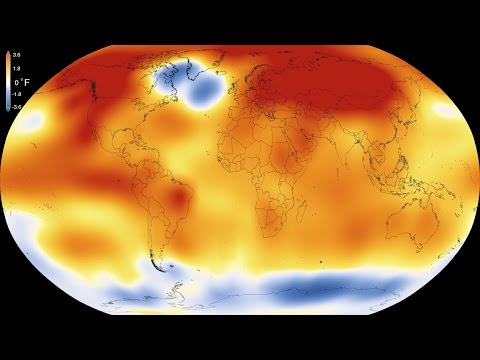

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

In [2]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7fc9f869bcd0>)

In [3]:
import numpy

In [4]:
#fname = '../data/land_global_temperature_anomaly-1880-2016.csv'
fname = 'land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter = ',', skiprows = 5, unpack = True)

In [5]:
from matplotlib import pyplot
%matplotlib inline

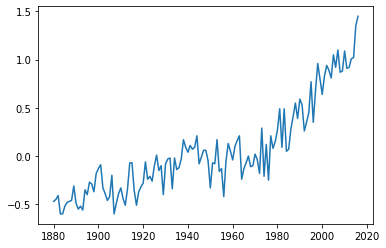

In [6]:
pyplot.plot(year, temp_anomaly);

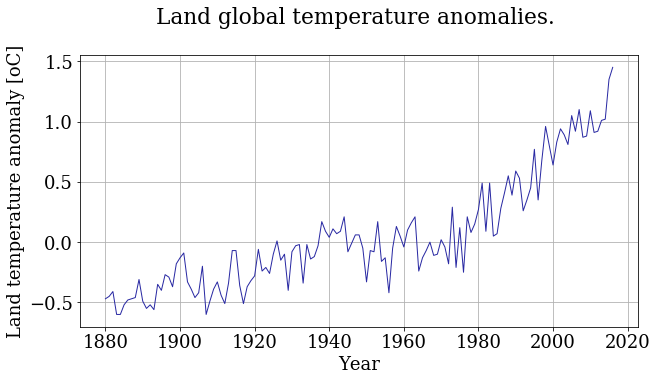

In [7]:
pyplot.rc('font', family='serif', size='18')
#Set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1)
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [oC]')
pyplot.grid();

In [8]:
def mean_value(array):
    """ Calculate the mean value of an array
    
    Arguments
    ---------
    array: Numpy array
    
    Returns
    ---------
    mean: mean value of the array
    """
    sum_elem = 0
    for element in array:
        sum_elem += element # this is the same as sum_elem = sum_elem + element
        
    mean = sum_elem / len(array)
    
    return mean

In [9]:
year_mean = mean_value(year)
print(year_mean)

1948.0


In [10]:
len(year)

137

In [11]:
type(year)

numpy.ndarray

In [12]:
temp_anomaly_mean = mean_value(temp_anomaly)
print(temp_anomaly_mean)

0.05262773722627737


**Use $\it Numpy.mean$ built-in function**

In [13]:
year_mean = numpy.mean(year)
print(year_mean)

1948.0


In [14]:
temp_anomaly_mean = numpy.mean(temp_anomaly)
print(temp_anomaly_mean)

0.05262773722627735


## Linear Regression ##

**Get Coefficients**

In [15]:
a_1 = numpy.sum(temp_anomaly*(year - year_mean)) / numpy.sum(year*(year - year_mean))

In [16]:
print(a_1)

0.01037028394347266


In [17]:
a_0 = temp_anomaly_mean - a_1*year_mean

In [18]:
print(a_0)

-20.148685384658464


**Use def() function to get the coefficients**

In [32]:
def coefficients(x, y, x_mean, y_mean):
    
    """This a def function for finding the coefficients 
    for the least-square linear regression
    a_1 and a_0"""
    
    a_1 = numpy.sum(y*(x - x_mean)) / numpy.sum(x*(x - x_mean))
    a_0 = temp_anomaly_mean - a_1*x_mean
    return a_1, a_0

coefficients(year, temp_anomaly, year_mean, temp_anomaly_mean)


0.01037028394347266


In [20]:
coefficients(year, temp_anomaly, year_mean, temp_anomaly_mean)

(0.01037028394347266, -20.148685384658464)

## Predicted Values ##

In [21]:
reg = a_0 + a_1 * year

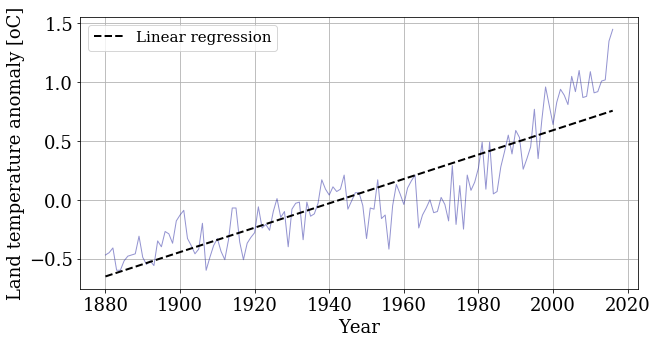

In [22]:
pyplot.figure(figsize=(10,5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5)
pyplot.plot(year, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [oC]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

## Apply regression using NumPy ##

**Use polyfit() function**

In [23]:
# First fit with NumPy, then name the coefficients obtained a_1n, a_0n:
a_1n, a_0n = numpy.polyfit(year, temp_anomaly, 1)

f_linear = numpy.poly1d((a_1n, a_0n))

In [24]:
print(a_1n)

0.01037028394347266


In [25]:
print(a_0n)

-20.14868538465846


In [26]:
print(f_linear)

 
0.01037 x - 20.15


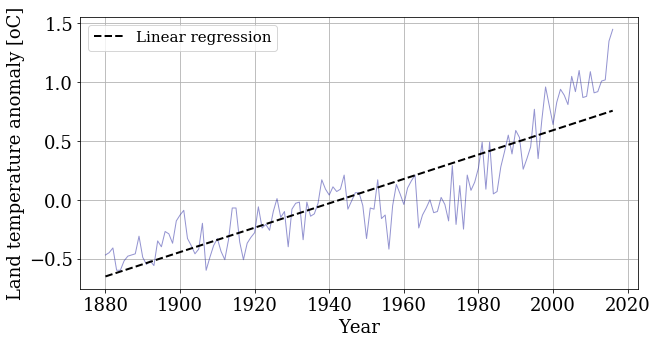

In [27]:
pyplot.figure(figsize=(10,5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5)
pyplot.plot(year, f_linear(year), 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [oC]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

## Split regression ##

In [28]:
numpy.where(year==1970)

(array([90]),)

**numpy.where() tells us where in the array the condition is True.**

In [29]:
year_1, temp_anomaly_1 = year[0:90], temp_anomaly[0:90]
year_2, temp_anomaly_2 = year[90:], temp_anomaly[90:]

m1, b1 = numpy.polyfit(year_1, temp_anomaly_1, 1)
m2, b2 = numpy.polyfit(year_2, temp_anomaly_2, 1)

f_linear_1 = numpy.poly1d((m1, b1))
f_linear_2 = numpy.poly1d((m2, b2))

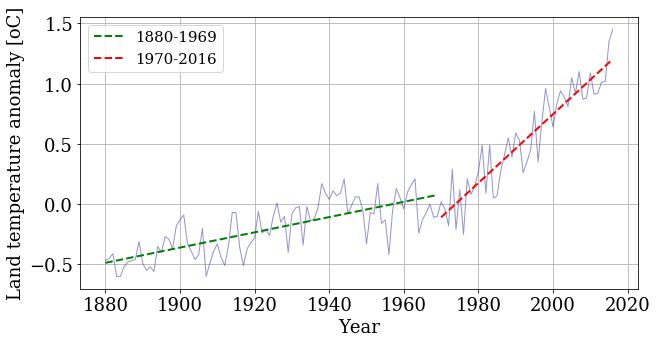

In [30]:
pyplot.figure(figsize=(10,5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5)
pyplot.plot(year_1, f_linear_1(year_1), 'g--', linewidth=2, label='1880-1969')
pyplot.plot(year_2, f_linear_2(year_2), 'r--', linewidth=2, label='1970-2016')

pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [oC]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();